# 가중치의 초깃값

오버피팅을 방지하기 위해서 가중치를 감소시키는 경우가 많다. 초깃값도 작게 설정한다.

그렇다면 초깃값을 0으로 두면 안될까? : 안된다. backprop에서 모든 가중치의 값이 똑같이 갱신되기 때문이다. 

--> 그렇기에 초깃값을 무작위로 설정해 주어야한다.

In [2]:
# 활성화 함수로 sigmoid를 사용하는 5층 신경망에 무작위로 생성한 입력데이터를 흘려 각 층의 활성화 값 분포를 히스토그램으로 그려보기
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000,100)
node_num = 100  #각 hidden_layer의 노드 개수
hidden_layer_size = 5  #5개의 hidden_layer
activations = {}  #활성화값 저장

for i in range(hidden_layer_size):
    if i != 0 :
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

<function matplotlib.pyplot.show(*args, **kw)>

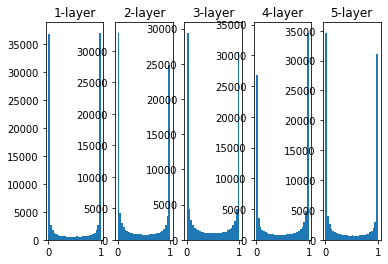

In [4]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(),30, range = (0,1))
plt.show

--> 기울기 소실

<function matplotlib.pyplot.show(*args, **kw)>

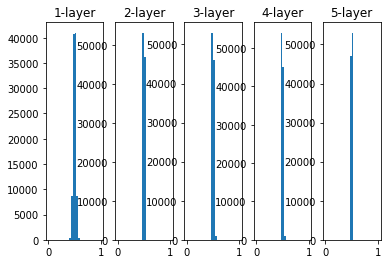

In [5]:
# 가중치의 표준편차를 0.01로 바꿔 같은 실험 반복

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000,100)
node_num = 100  #각 hidden_layer의 노드 개수
hidden_layer_size = 5  #5개의 hidden_layer
activations = {}  #활성화값 저장

for i in range(hidden_layer_size):
    if i != 0 :
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 0.01  #1
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(),30, range = (0,1))
plt.show

기울기 소실은 일어나지 않지만 활성화 값들이 치우졌다는 점에서 표현력을 제한하고 있다.

-->고르게 분포되는 것이 가장 이상적

### Xavier 초깃값

: 각 층의 활성화 값들을 광범위하게 분포시킬 먹적으로 가중치의 적절한 분포를 찾고자 함.
    
--> 앞 계층의 노드의 개수가 n개라면 표준편차가 1/(루트n)인 분포를 사용하면 된다!

<function matplotlib.pyplot.show(*args, **kw)>

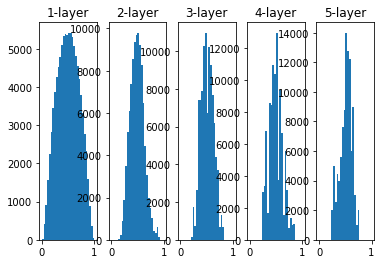

In [8]:
#node_num = 100  #앞 층의 노드 수
#W = np.random.randn(node_num, node_num) / np.sqrt(node_num) 을 사용할 것

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000,100)
node_num = 100  #각 hidden_layer의 노드 개수
hidden_layer_size = 5  #5개의 hidden_layer
activations = {}  #활성화값 저장

for i in range(hidden_layer_size):
    if i != 0 :
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(),30, range = (0,1))
plt.show

Xavier 초기화는 활성화 함수가 선형일 때 사용한다. sigmoid나 tanh는 원점에 대하여 대칭이기 때문에 중앙부근이 선형이라고 생각했다

ReLU는 선형이지 않다! -> He 초깃값 사용!

### He initializer

:앞 층의 노드가 n개일 때, 표준편차로 np.sqrt(2/n)을 사용한다. (Xavier보다 2배 큰 계수이다)

<function matplotlib.pyplot.show(*args, **kw)>

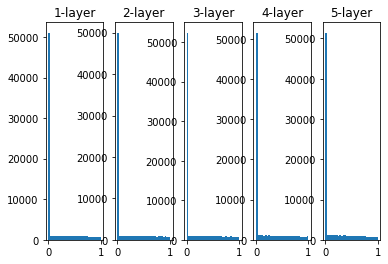

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0,x) #maximum함수 - 0과 x 사이에서 큰 값을 선택 반환한다.

x = np.random.randn(1000,100)
node_num = 100  #각 hidden_layer의 노드 개수
hidden_layer_size = 5  #5개의 hidden_layer
activations = {}  #활성화값 저장

for i in range(hidden_layer_size):
    if i != 0 :
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num/2)
    a = np.dot(x,w)
    z = relu(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(),30, range = (0,1))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

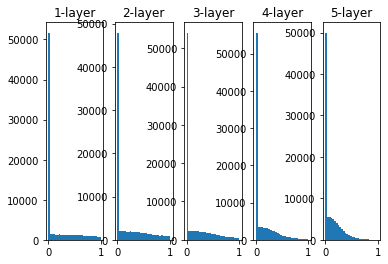

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0,x) #maximum함수 - 0과 x 사이에서 큰 값을 선택 반환한다.

x = np.random.randn(1000,100)
node_num = 100  #각 hidden_layer의 노드 개수
hidden_layer_size = 5  #5개의 hidden_layer
activations = {}  #활성화값 저장

for i in range(hidden_layer_size):
    if i != 0 :
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x,w)
    z = relu(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(),30, range = (0,1))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

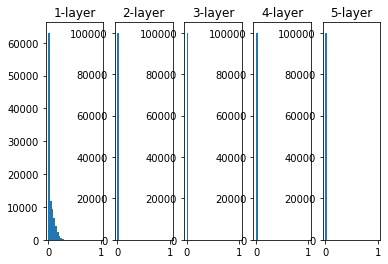

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0,x) #maximum함수 - 0과 x 사이에서 큰 값을 선택 반환한다.

x = np.random.randn(1000,100)
node_num = 100  #각 hidden_layer의 노드 개수
hidden_layer_size = 5  #5개의 hidden_layer
activations = {}  #활성화값 저장

for i in range(hidden_layer_size):
    if i != 0 :
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x,w)
    z = relu(a)
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(),30, range = (0,1))
plt.show